<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_An%C3%A1lise_de_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Séries Temporais

**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Y = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
Y = Y['Passengers']
Y

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

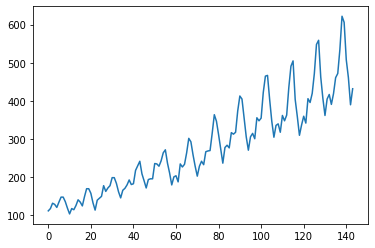

In [ ]:
plt.plot(Y)

## Análise da Série Temporal

### Teste de Estacionariedade - ADF

O Teste de Dickey-Fuller Aumentado (ADF) testa, para um processo estocástico P modelado por uma equação autoregressiva AR(p), se as raízes desse modelo são unitárias. Se forem P é não-estacionário, do contrário estacionário. As hipóteses de teste são:

* $H_0$: O processo possui raiz unitária, logo é **não-estacionário**.
* $H_1$: O processo não possui raiz unitária, logo é **estacionário**.

A estatística de teste ADF ao nível de significância $\alpha$ é um número negativo e, quanto mais negativo e distante dos valores críticos, maior a evidência contrária à $H_0$. 

A estatística ADF também pode ser convertida em um p-valor da distribuição de teste e se o valor-p for maior do que $\alpha$, então aceitamos $H_0$ ao nível de significância $\alpha$ de que o processo é não estacionário. Do contrário, dizemos que não há evidências para aceitar $H_0$ então o processo é estacionário.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ADF(X):
  print("\n\t---------------------------------------------------------")
  print("\tTeste de Estacionariedade - Dickey-Fuller Aumentado (ADF)")
  print("\t---------------------------------------------------------")
  print("H0: O processo é não-estacionário.")
  print("H1: O processo é estacionário.")
  result = adfuller(X)
  print('\nEstatística ADF: {}'.format(result[0]))
  print('p-Valor: {}'.format(result[1]))
  print('Valores Críticos:')
  print('\tAlfa\tVal. Crit\tResultado')
  for key, value in result[4].items():
    h0 = "H0 Aceita" if result[0] > value else "H0 Rejeitada"
    print('\t{}\t{}\t{}'.format(key, value, h0))

ADF(Y)


	---------------------------------------------------------
	Teste de Estacionariedade - Dickey-Fuller Aumentado (ADF)
	---------------------------------------------------------
H0: O processo é não-estacionário.
H1: O processo é estacionário.

Estatística ADF: 0.8153688792060418
p-Valor: 0.9918802434376409
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4816817173418295	H0 Aceita
	5%	-2.8840418343195267	H0 Aceita
	10%	-2.578770059171598	H0 Aceita



	---------------------------------------------------------
	Teste de Estacionariedade - Dickey-Fuller Aumentado (ADF)
	---------------------------------------------------------
H0: O processo é não-estacionário.
H1: O processo é estacionário.

Estatística ADF: -6.216924658147012
p-Valor: 5.337872448449198e-08
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.479742586699182	H0 Rejeitada
	5%	-2.88319822181578	H0 Rejeitada
	10%	-2.578319684499314	H0 Rejeitada


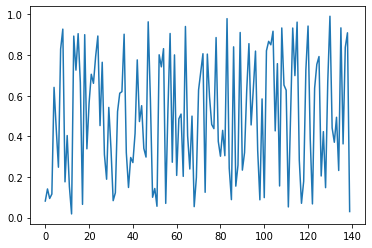

In [ ]:
iid = np.random.rand(140)

plt.plot(iid)

ADF(iid)

### Teste de Homocedasticidade - Levene

O teste de Levene compara a variância de vários conjuntos de dados e verifica que elas são significativamente diferentes. No caso de processos estocásticos, deve-se dividir o processo em sub-amostras de igual tamanho e executar o teste para verificar a igualdade das médias entre os sub-amostras. 

As hipóteses do teste são:

$H_0$: As variâncias das sub-amostras são iguais, indicando **homocedasticidade**.

$H_1$: Ao menos uma das sub-amostras tem variância diferente das demais, indicando **heterocedasticidade**.

In [ ]:
from scipy.stats import levene

def Levene(X):
  print("\n\t---------------------------------------------------------")
  print("\tTeste de Homocedasticidade - Levene")
  print("\t---------------------------------------------------------")
  print("H0: As variâncias das sub-amostras são iguais, a série é homocedástica.")
  print("H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica")
  janelas = np.array_split(X, 5)
  resultado = levene(*janelas)
  print("\nEstatística de teste: {}".format(resultado.statistic))
  print("p-Valor: {}".format(resultado.pvalue))
  print("Resultado: {}".format('H0 Aceita' if resultado.pvalue > 0.05 else 'H0 Rejeitada'))
  
Levene(Y)



	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 7.337726286570979
p-Valor: 2.1646367496588464e-05
Resultado: H0 Rejeitada



	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 0.35672587160553054
p-Valor: 0.838985180501878
Resultado: H0 Aceita


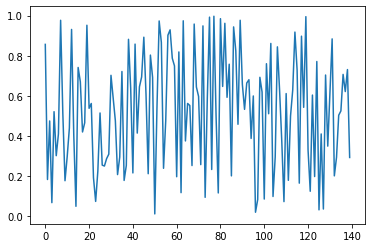

In [ ]:
iid = np.random.rand(140)

plt.plot(iid)

Levene(iid)

### AutoCorrelação (ACF) e Autocorrelação Parcial (PACF)

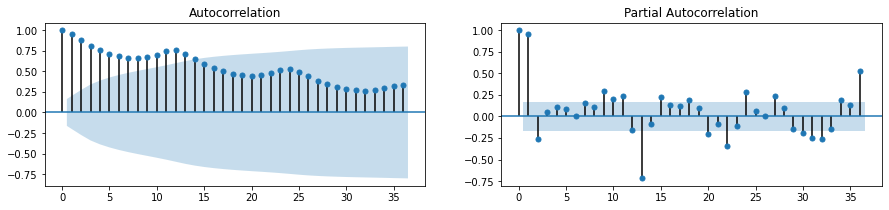

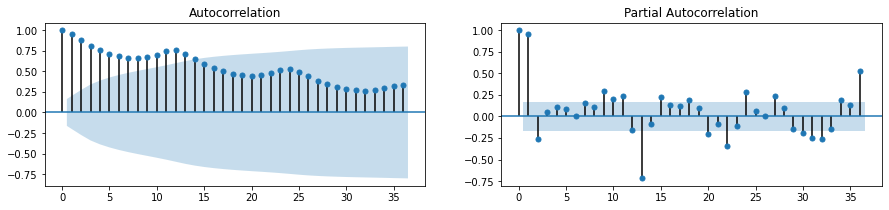

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

plot_acf(Y, lags=36, ax=ax[0])
plot_pacf(Y, lags=36, ax=ax[1])

### Teste de Ljung-Box

O Teste de Ljung-Box teste se uma autocorrelação $\rho(k)$, para um lag $k$, é significativamente diferente de zero ou se o valor da autocorrelação $\rho(k)$ é fruto de uma flutuação aleatória.

As hipóteses do teste são, para cada lag $k$:

$H_0$: $\rho(k)$ não é significativamente diferente de zero, indicando que **não há autocorrelação**.

$H_1$: $\rho(k)$ é significativamente diferente de zero, indicando que **há autocorrelação**.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

def LjungBox(X, lags=12):
  print("\n\t---------------------------------------------------------")
  print("\tTeste de Autocorrelação - Ljung-Box")
  print("\t---------------------------------------------------------")
  print("H0: O lag não tem autocorrelação (é IID).")
  print("H1: O lag tem autocorrelação.")
  lj, pval = acorr_ljungbox(X, lags=lags)
  for i in range(len(lj)):
    print("LAG {}".format(i+1))
    print("\tEstatística de teste: {}".format(lj[i]))
    print("\tp-Valor: {}".format(pval[i]))
    print("\tResultado: {}".format('H0 Aceita' if pval[i] > 0.05 else 'H0 Rejeitada'))


LjungBox(Y, lags=24)


	---------------------------------------------------------
	Teste de Autocorrelação - Ljung-Box
	---------------------------------------------------------
H0: O lag não tem autocorrelação (é IID).
H1: O lag tem autocorrelação.
LAG 1
	Estatística de teste: 132.14153857841032
	p-Valor: 1.3932314016442917e-30
	Resultado: H0 Rejeitada
LAG 2
	Estatística de teste: 245.64616027563707
	p-Valor: 4.556318194291784e-54
	Resultado: H0 Rejeitada
LAG 3
	Estatística de teste: 342.6748258570253
	p-Valor: 5.7510884647118555e-74
	Resultado: H0 Rejeitada
LAG 4
	Estatística de teste: 427.7386835522467
	p-Valor: 2.817730622177359e-91
	Resultado: H0 Rejeitada
LAG 5
	Estatística de teste: 504.7965704070952
	p-Valor: 7.360195242554827e-107
	Resultado: H0 Rejeitada
LAG 6
	Estatística de teste: 575.6018536032258
	p-Valor: 4.264007696700565e-121
	Resultado: H0 Rejeitada
LAG 7
	Estatística de teste: 643.0385933711698
	p-Valor: 1.3054628342208763e-134
	Resultado: H0 Rejeitada
LAG 8
	Estatística de teste: 709.484


	---------------------------------------------------------
	Teste de Autocorrelação - Ljung-Box
	---------------------------------------------------------
H0: O lag não tem autocorrelação (é IID).
H1: O lag tem autocorrelação.
LAG 1
	Estatística de teste: 0.025699949411676706
	p-Valor: 0.8726352768504914
	Resultado: H0 Aceita
LAG 2
	Estatística de teste: 0.143402661904317
	p-Valor: 0.9308088580951438
	Resultado: H0 Aceita
LAG 3
	Estatística de teste: 1.2759845089030721
	p-Valor: 0.7348435374559212
	Resultado: H0 Aceita
LAG 4
	Estatística de teste: 2.644106840415786
	p-Valor: 0.6190300068881773
	Resultado: H0 Aceita
LAG 5
	Estatística de teste: 2.82962850862659
	p-Valor: 0.7262319827153426
	Resultado: H0 Aceita
LAG 6
	Estatística de teste: 5.54561507489645
	p-Valor: 0.4759607384885094
	Resultado: H0 Aceita
LAG 7
	Estatística de teste: 10.51811813544105
	p-Valor: 0.1610632768929133
	Resultado: H0 Aceita
LAG 8
	Estatística de teste: 11.125918219737052
	p-Valor: 0.19466607581814518
	Resul

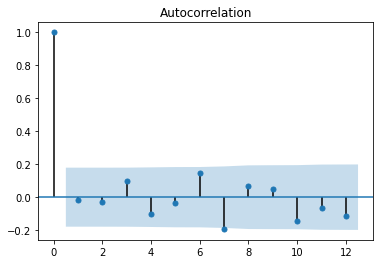

In [ ]:
iid = np.random.rand(120)

plot_acf(iid, lags=12)

LjungBox(iid,12)

## Transformações

In [ ]:
def plotar_transformacao(Y, transformacao, k = 10):
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
  ax[0][0].plot(Y)
  ax[0][0].set_title("Série Original")
  ax[0][0].set_ylabel("$\Omega$")
  ax[0][0].set_xlabel("$T$")
  Yz = transformacao(Y)
  ax[0][1].plot(Yz)
  ax[0][1].set_title("Série Transformada")
  ax[0][1].set_xlabel("$T$")

  plot_acf(Y, lags=k, ax=ax[1][0])
  plot_acf(Yz, lags=k, ax=ax[1][1])
  #plot_pacf(dataset, lags=10, ax=ax[ct][1])

  plt.tight_layout()



### Médias Móveis

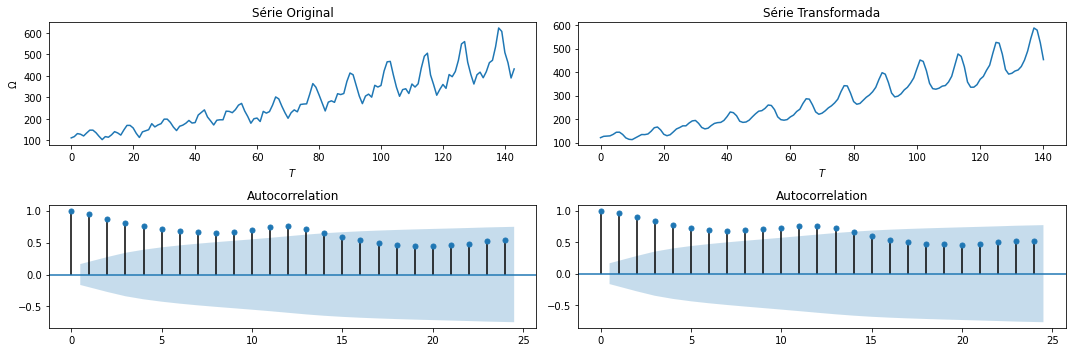

In [ ]:
def media_movel(Y, k=3):
  return np.array([np.mean(Y[i-k:i]) for i in range(k,len(Y))])

mm = lambda x: media_movel(x, k=3)

plotar_transformacao(Y, mm, k = 24)

### Discretização (Binning)

In [ ]:
np.linspace(np.min(Y), np.max(Y), 5)

array([104. , 233.5, 363. , 492.5, 622. ])

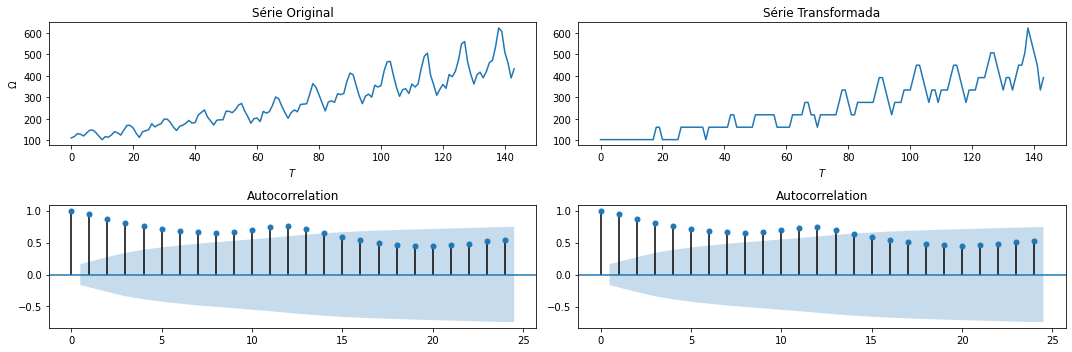

In [ ]:
def binning(X, nbins=10):
  bins = np.linspace(np.min(X), np.max(X), nbins)
  indices = np.digitize(X, bins)
  return np.array([bins[i-1] for i in indices])

plotar_transformacao(Y, binning, k = 24)

### Remover Média

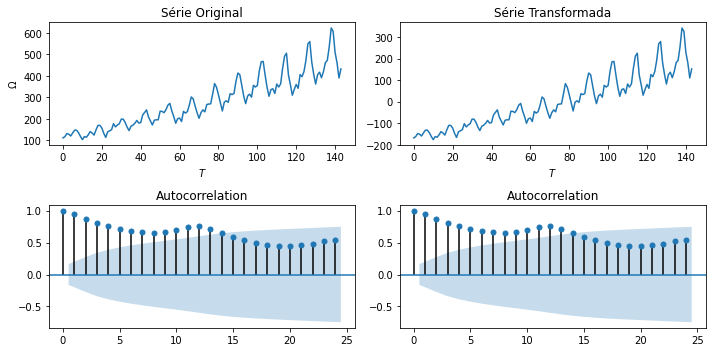

In [ ]:
def remover_media(Y):
  m = np.mean(Y)
  return Y - m

plotar_transformacao(Y, remover_media, k = 24)

### Normalizar

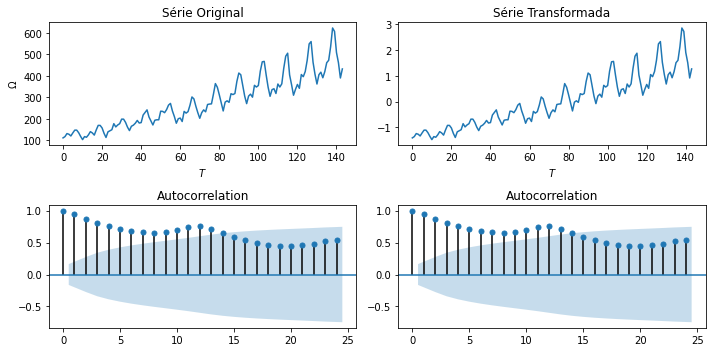

In [ ]:
def normalizar(Y, inversa=False):
  mu = np.mean(Y)
  sigma = np.std(Y)
  return (Y - mu)/sigma

plotar_transformacao(Y, normalizar, k = 24)

### Escala

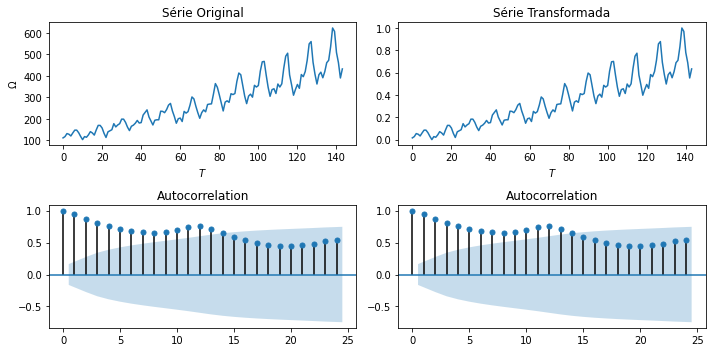

In [ ]:
def escala(Y):
  _min = np.min(Y)
  _max = np.max(Y)
  return (Y - _min)/ (_max - _min)

plotar_transformacao(Y, escala, k = 24)

### Diferenciação

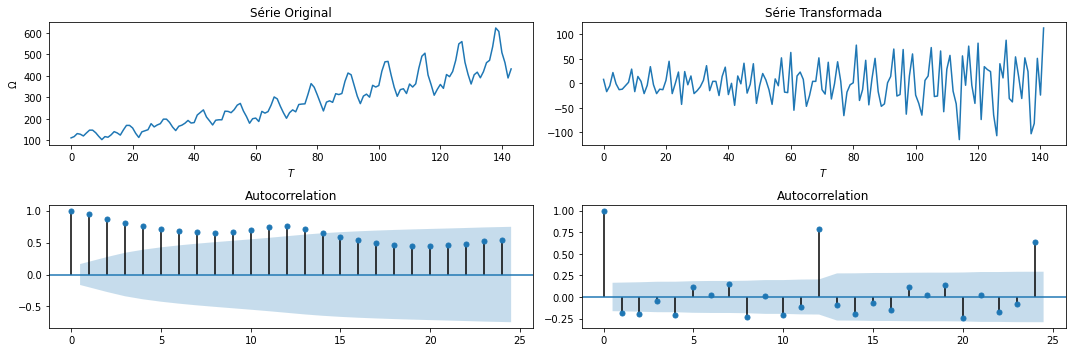

In [ ]:
def diferenciar(Y, ordem=1):
  tmp = Y
  for i in range(ordem):
    tmp2 = [tmp[i-1] - tmp[i] for i in range(1, len(tmp))]
    tmp = tmp2
  return tmp

diff = lambda x: diferenciar(x, ordem=2)

plotar_transformacao(Y, diff, k = 24)

In [ ]:
Y1 = diferenciar(Y, ordem=2)
ADF(Y1)
Levene(Y1)


	---------------------------------------------------------
	Teste de Estacionariedade - Dickey-Fuller Aumentado (ADF)
	---------------------------------------------------------
H0: O processo é não-estacionário.
H1: O processo é estacionário.

Estatística ADF: -16.384231542468513
p-Valor: 2.7328918500142026e-29
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4816817173418295	H0 Rejeitada
	5%	-2.8840418343195267	H0 Rejeitada
	10%	-2.578770059171598	H0 Rejeitada

	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 11.08475779469687
p-Valor: 8.088650777837283e-08
Resultado: H0 Rejeitada


### Remoção da Tendência

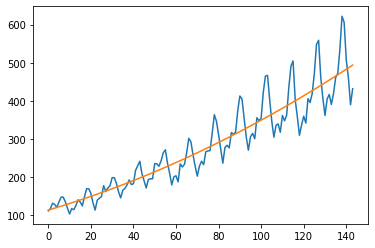

In [ ]:
T = np.array([i for i in range(len(Y))])

regressao = np.poly1d(np.polyfit(T, Y, 2))

plt.plot(T, Y)
plt.plot(T, regressao(T))
plt.show() 

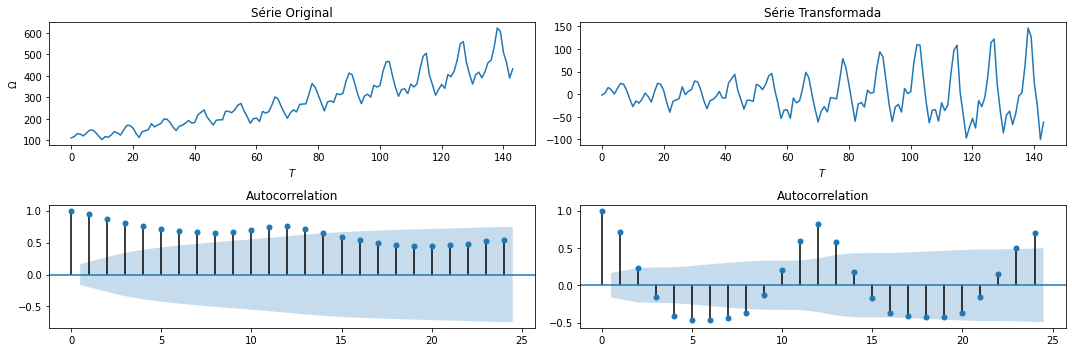

In [ ]:
def remover_tendencia(Y, grau=2):
  T = np.array([i for i in range(len(Y))])
  regressao = np.poly1d(np.polyfit(T, Y, grau))

  return np.array([Y[i] - regressao(i) for i in T]).flatten()

plotar_transformacao(Y, remover_tendencia, k = 24)

In [ ]:
Y1 = remover_tendencia(Y)
ADF(Y1)
#Y2


	---------------------------------------------------------
	Teste de Estacionariedade - Dickey-Fuller Aumentado (ADF)
	---------------------------------------------------------
H0: O processo é não-estacionário.
H1: O processo é estacionário.

Estatística ADF: -3.231780978518674
p-Valor: 0.01821721456649623
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4816817173418295	H0 Aceita
	5%	-2.8840418343195267	H0 Rejeitada
	10%	-2.578770059171598	H0 Rejeitada


### Remoção da Sazonalidade

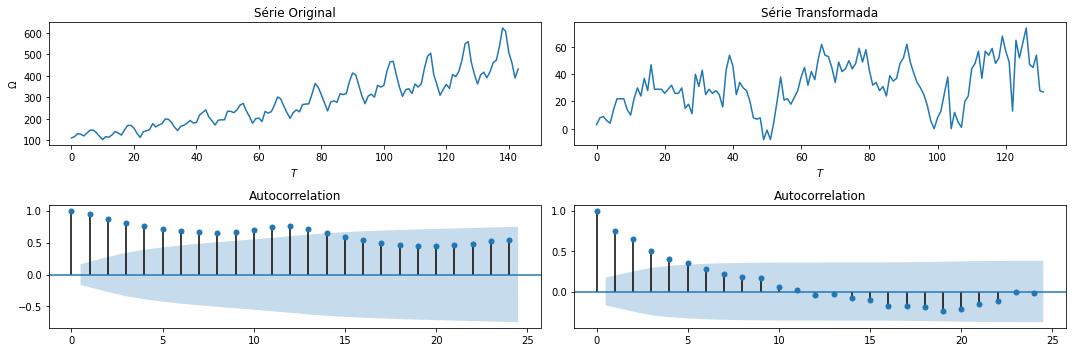

In [ ]:
def remover_sazonalidade(Y, periodo=10):
  return np.array([Y[i] - Y[i - periodo] for i in range(periodo, len(Y))])

rs = lambda x: remover_sazonalidade(x, periodo=12)

plotar_transformacao(Y, rs, k = 24)

### Variância Condicional

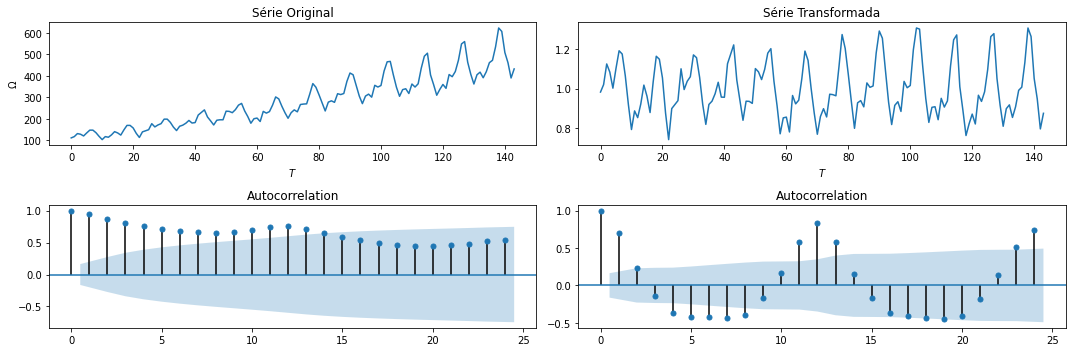

In [ ]:
from sklearn.linear_model import LinearRegression

def estabilizar_variancia(Y, grau=2, janela=12):
  T = np.array([i for i in range(len(Y))])
  Y2 = np.repeat(np.sqrt(np.std(Y[0:janela])), len(Y))
  for i in range(janela, len(Y)):
    Y2[i] += np.sqrt(np.std(Y[i-janela: i]))

  regressao = np.poly1d(np.polyfit(T, Y, grau))

  return np.array([Y[i] / regressao(i) for i in T]).flatten()

plotar_transformacao(Y, estabilizar_variancia, k = 24)

In [ ]:
Y1 = estabilizar_variancia(Y)
Levene(Y1)


	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 0.9802106830294941
p-Valor: 0.4205114601421065
Resultado: H0 Aceita


### Box-Cox Power Transformation

$$
y^*(t) = \left\{ \begin{array}{cl} \frac{y(t)^\lambda -1}{\lambda} &\textrm{ Se } y(t) \neq 0 \\ \log y(t)  &\textrm{ Se } y(t) = 0\end{array} \right.
$$

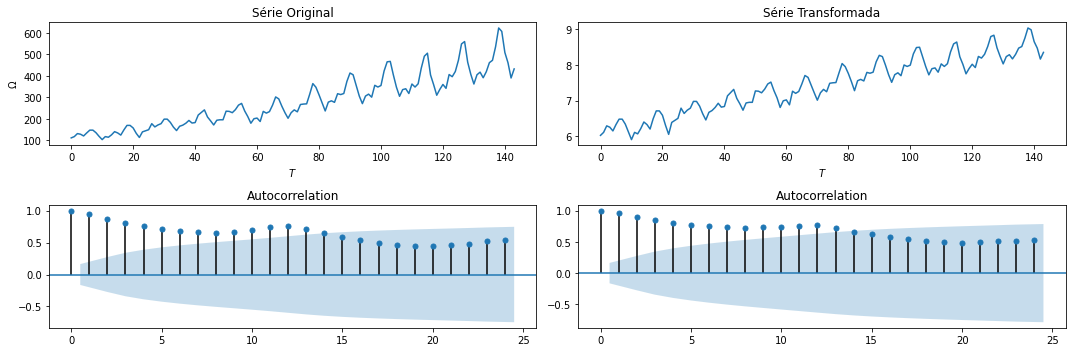

In [ ]:
def box_cox(Y, l=.1):
  ret = np.zeros(len(Y))
  for i in range(len(Y)):
    if Y[i] != 0:
      ret[i] = (Y[i] ** l - 1)/l
    else:
      ret[i] = np.log(Y[i])
  return ret


plotar_transformacao(Y, box_cox, k = 24)

In [ ]:
Y2 = box_cox(Y)
Levene(Y2)


	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 0.4603759278146877
p-Valor: 0.7646960633476667
Resultado: H0 Aceita


### ROI - Return Over Investment

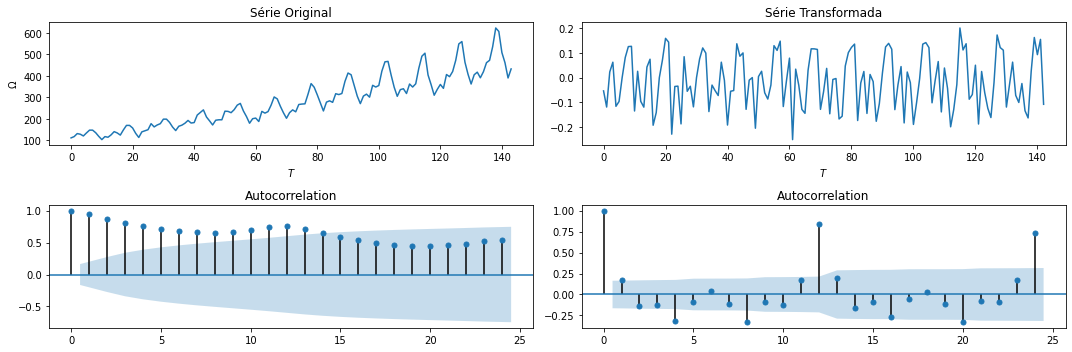

In [ ]:
def roi(Y):
  return np.array([(Y[i-1] - Y[i])/Y[i-1] for i in range(1,len(Y))])

plotar_transformacao(Y, roi, k = 24)

In [ ]:
Y2 = roi(Y)
ADF(Y2)
Levene(Y2)


	---------------------------------------------------------
	Teste de Estacionariedade - Dickey-Fuller Aumentado (ADF)
	---------------------------------------------------------
H0: O processo é não-estacionário.
H1: O processo é estacionário.

Estatística ADF: -2.9261089075453928
p-Valor: 0.0423950397252386
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4825006939887997	H0 Aceita
	5%	-2.884397984161377	H0 Rejeitada
	10%	-2.578960197753906	H0 Rejeitada

	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 0.4636272985901042
p-Valor: 0.7623242935599679
Resultado: H0 Aceita


### Compondo Transformações


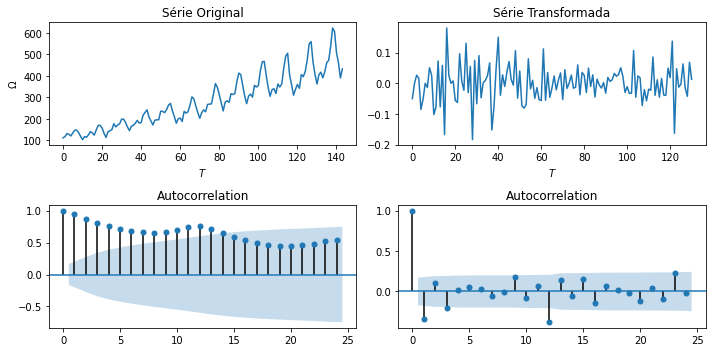

In [ ]:
composicao1 = lambda x: diferenciar(remover_sazonalidade(remover_tendencia(box_cox(x, l=0.05)), periodo=12))

plotar_transformacao(Y, composicao1, k = 24)

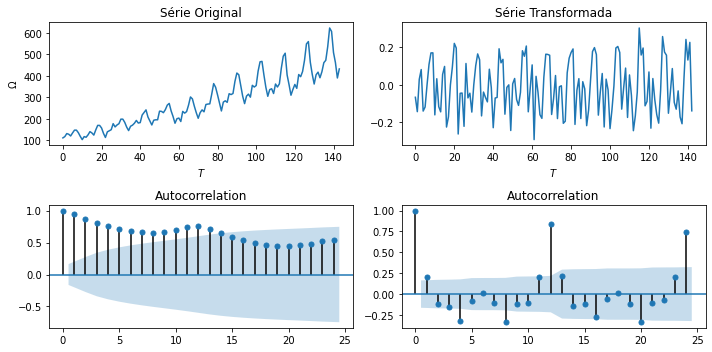

In [ ]:
composicao1 = lambda x: diferenciar(box_cox(x, l=0.05))

plotar_transformacao(Y, composicao1, k = 24)

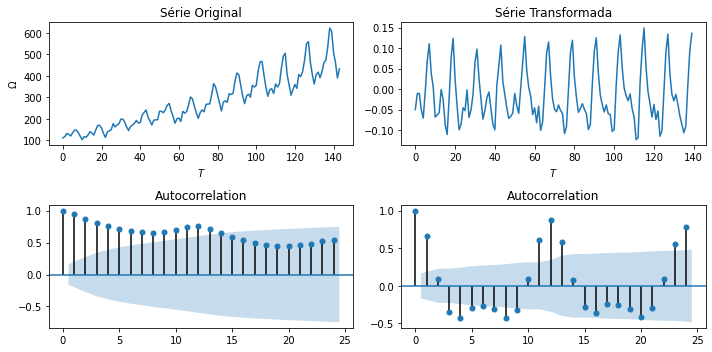

In [ ]:
composicao1 = lambda x: media_movel(roi(x))

plotar_transformacao(Y, composicao1, k = 24)

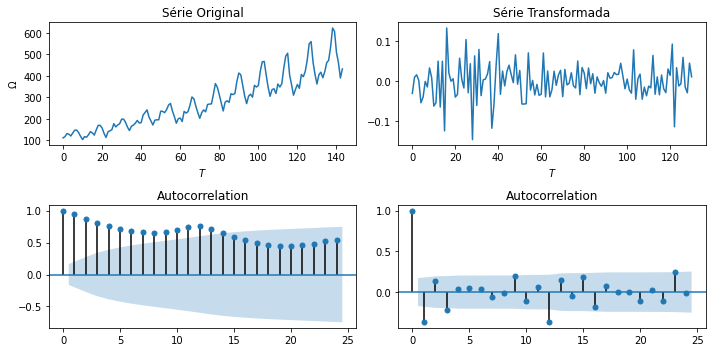

In [ ]:
composicao1 = lambda x: diferenciar(
    remover_sazonalidade(
        remover_tendencia(
            remover_media(
                estabilizar_variancia(x)
            )
        )
      , periodo=12)
)

plotar_transformacao(Y, composicao1, k = 24)

## Decomposição da Série Temporal

Y = Processo Heterocedástico * (Nível + Tendência + Sazonalidade + Processo AR(2) + Ruído)


	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 0.9802106830294941
p-Valor: 0.4205114601421065
Resultado: H0 Aceita


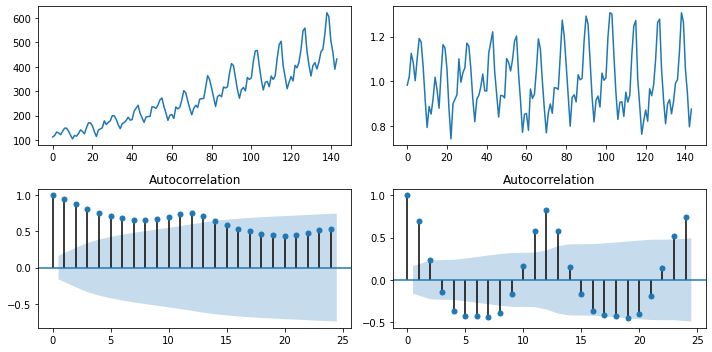

In [ ]:
#Componente de heterocedasticidade
# Estabilizar a variância é equivalene à subtrari um processo heterocedástico da série
Y1 = estabilizar_variancia(Y, grau=2)

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0][0].plot(Y)
plot_acf(Y, lags=24, ax=ax[1][0])
ax[0][1].plot(Y1)
plot_acf(Y1, lags=24, ax=ax[1][1])
plt.tight_layout()

Levene(Y1)


	---------------------------------------------------------
	Teste de Estacionariedade - Dickey-Fuller Aumentado (ADF)
	---------------------------------------------------------
H0: O processo é não-estacionário.
H1: O processo é estacionário.

Estatística ADF: -3.2710033965998653
p-Valor: 0.01622543494787829
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4816817173418295	H0 Aceita
	5%	-2.8840418343195267	H0 Rejeitada
	10%	-2.578770059171598	H0 Rejeitada

	---------------------------------------------------------
	Teste de Homocedasticidade - Levene
	---------------------------------------------------------
H0: As variâncias das sub-amostras são iguais, a série é homocedástica.
H1: As variâncias das sub-amostras são diferentes, a série é heterocedástica

Estatística de teste: 0.9902409775707072
p-Valor: 0.41507919889516665
Resultado: H0 Aceita


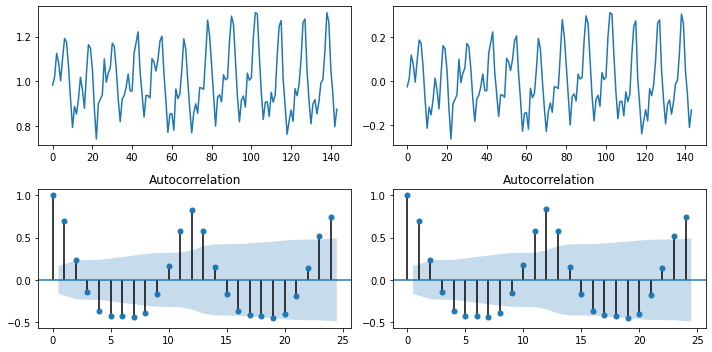

In [ ]:
#Componente de Nível
#Remover o nível é equivalente à subtrair a média do processo
Y2 = remover_tendencia(Y1)

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0][0].plot(Y1)
plot_acf(Y1, lags=24, ax=ax[1][0])
ax[0][1].plot(Y2)
plot_acf(Y2, lags=24, ax=ax[1][1])
plt.tight_layout()

ADF(Y2)
Levene(Y2)


	---------------------------------------------------------
	Teste de Autocorrelação - Ljung-Box
	---------------------------------------------------------
H0: O lag não tem autocorrelação (é IID).
H1: O lag tem autocorrelação.
LAG 1
	Estatística de teste: 64.68069211836034
	p-Valor: 8.80736730067562e-16
	Resultado: H0 Rejeitada
LAG 2
	Estatística de teste: 114.87415619981068
	p-Valor: 1.1360407884110522e-25
	Resultado: H0 Rejeitada
LAG 3
	Estatística de teste: 141.48410697454014
	p-Valor: 1.8090396552225054e-30
	Resultado: H0 Rejeitada
LAG 4
	Estatística de teste: 163.02195437422432
	p-Valor: 3.2865793609503164e-34
	Resultado: H0 Rejeitada
LAG 5
	Estatística de teste: 177.70065694158495
	p-Valor: 1.657509526257234e-36
	Resultado: H0 Rejeitada
LAG 6
	Estatística de teste: 186.05044100540812
	p-Valor: 1.758603385025882e-37
	Resultado: H0 Rejeitada
LAG 7
	Estatística de teste: 189.3056646048031
	p-Valor: 2.104044450500568e-37
	Resultado: H0 Rejeitada
LAG 8
	Estatística de teste: 190.5011

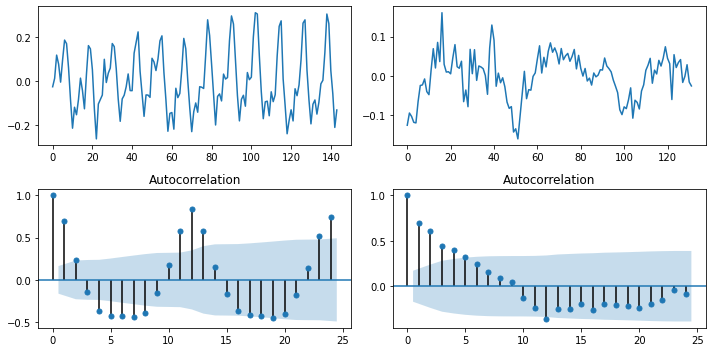

In [ ]:
#Componente de Sazonalidade
# Remover a sazonalidade é equivalente a subtrair um processo CSP da série
Y3 = remover_sazonalidade(Y2, periodo=12)

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0][0].plot(Y2)
plot_acf(Y2, lags=24, ax=ax[1][0])
ax[0][1].plot(Y3)
plot_acf(Y3, lags=24, ax=ax[1][1])
plt.tight_layout()

LjungBox(Y3, lags=24)


	---------------------------------------------------------
	Teste de Autocorrelação - Ljung-Box
	---------------------------------------------------------
H0: O lag não tem autocorrelação (é IID).
H1: O lag tem autocorrelação.
LAG 1
	Estatística de teste: 57.52689122726018
	p-Valor: 3.3338991260962784e-14
	Resultado: H0 Rejeitada
LAG 2
	Estatística de teste: 100.56344195460979
	p-Valor: 1.455211234685533e-22
	Resultado: H0 Rejeitada
LAG 3
	Estatística de teste: 118.63238992655958
	p-Valor: 1.5204116254727694e-25
	Resultado: H0 Rejeitada
LAG 4
	Estatística de teste: 135.13220681947288
	p-Valor: 3.1083047693051495e-28
	Resultado: H0 Rejeitada
LAG 5
	Estatística de teste: 143.6358682422516
	p-Valor: 3.0173064133996506e-29
	Resultado: H0 Rejeitada
LAG 6
	Estatística de teste: 147.97662886841718
	p-Valor: 2.0716564137010461e-29
	Resultado: H0 Rejeitada
LAG 7
	Estatística de teste: 149.31435213639452
	p-Valor: 5.65577817749788e-29
	Resultado: H0 Rejeitada
LAG 8
	Estatística de teste: 149.52

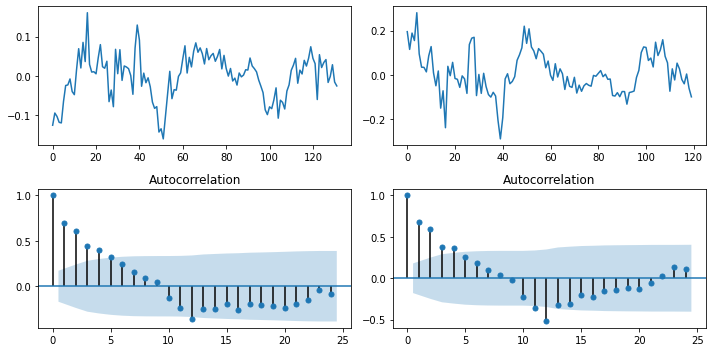

In [ ]:
Y4 = remover_sazonalidade(Y3, periodo=12)

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0][0].plot(Y3)
plot_acf(Y3, lags=24, ax=ax[1][0])
ax[0][1].plot(Y4)
plot_acf(Y4, lags=24, ax=ax[1][1])
plt.tight_layout()

LjungBox(Y4, lags=24)


	---------------------------------------------------------
	Teste de Autocorrelação - Ljung-Box
	---------------------------------------------------------
H0: O lag não tem autocorrelação (é IID).
H1: O lag tem autocorrelação.
LAG 1
	Estatística de teste: 58.10460892458949
	p-Valor: 2.4854332201404247e-14
	Resultado: H0 Rejeitada
LAG 2
	Estatística de teste: 75.95685274605776
	p-Valor: 3.20759106337955e-17
	Resultado: H0 Rejeitada
LAG 3
	Estatística de teste: 90.41739907829083
	p-Valor: 1.7819818760661203e-19
	Resultado: H0 Rejeitada
LAG 4
	Estatística de teste: 94.53697023906624
	p-Valor: 1.4296226281637015e-19
	Resultado: H0 Rejeitada
LAG 5
	Estatística de teste: 94.71790447634764
	p-Valor: 6.845681185807573e-19
	Resultado: H0 Rejeitada
LAG 6
	Estatística de teste: 94.95796480920191
	p-Valor: 2.8209908680614097e-18
	Resultado: H0 Rejeitada
LAG 7
	Estatística de teste: 95.32358316953153
	p-Valor: 9.942303532143494e-18
	Resultado: H0 Rejeitada
LAG 8
	Estatística de teste: 95.668120018

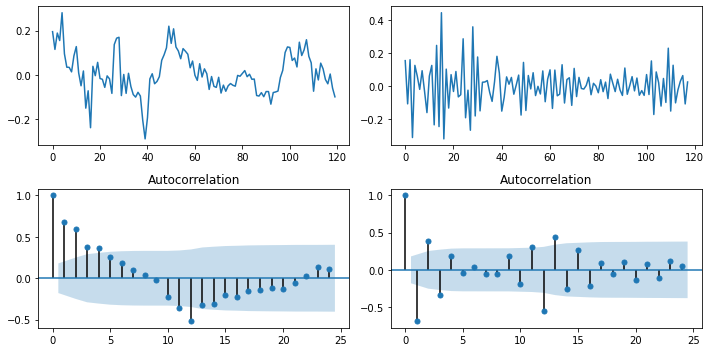

In [ ]:
Y5 = diferenciar(Y4, ordem=2)

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0][0].plot(Y4)
plot_acf(Y4, lags=24, ax=ax[1][0])
ax[0][1].plot(Y5)
plot_acf(Y5, lags=24, ax=ax[1][1])
plt.tight_layout()

LjungBox(Y5, lags=24)

### Decomposição Alternativa, usando transformações diferentes

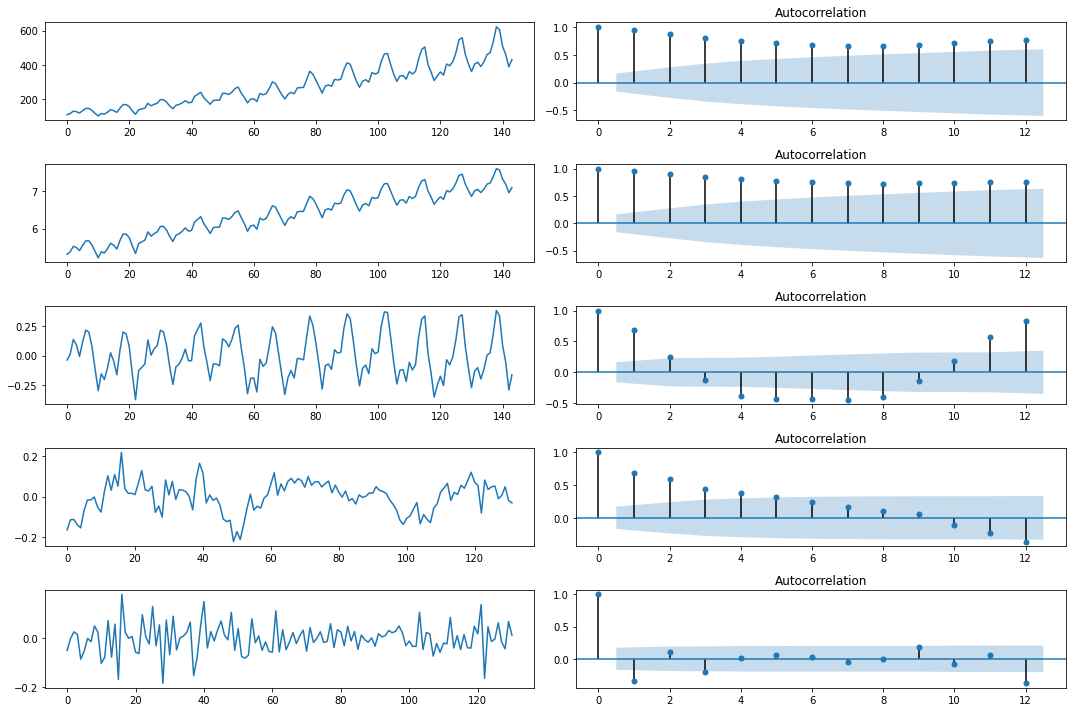

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))

# Série Original
ax[0][0].plot(Y)
plot_acf(Y, lags=12, ax=ax[0][1])


#Componente de heterocedasticidade
# Estabilizar a variância é equivalene à subtrari um processo heterocedástico da série
Y1 = box_cox(Y, l=0.05)

ax[1][0].plot(Y1)
plot_acf(Y1, lags=12, ax= ax[1][1])

#Componente de Tendência
#Remover a tendência é equivalente à subtrair um processo TSP da série
Y2 = remover_tendencia(Y1)

ax[2][0].plot(Y2)
plot_acf(Y2, lags=12, ax= ax[2][1])

#Componente de Sazonalidade
# Remover a sazonalidade é equivalente a subtrair um processo CSP da série
Y3 = remover_sazonalidade(Y2, periodo=12)

ax[3][0].plot(Y3)
plot_acf(Y3, lags=12, ax= ax[3][1])

#Componente Aditivo / Autoregressivo
# Diferenciar a série é equivalente a 
Y4 = diferenciar(Y3)

ax[4][0].plot(Y4)
plot_acf(Y4, lags=12, ax= ax[4][1])

plt.tight_layout()

In [ ]:
ADF(Y2)
Levene(Y2)

### Decomposição automática

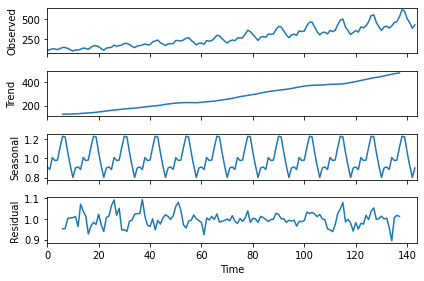

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Y = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

result = seasonal_decompose(Y['Passengers'].values, model='multiplicative', freq=12)

result.plot()

plt.show()

In [ ]:
result.__dict__

{'nobs': 144,
 'observed': array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
        229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
        264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
        364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
        405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
        404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
        359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
        362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
        432]),
 'resid': array([       nan,        nan,        nan,        nan,        nan,
               nan, 0.95166432, 0.95340141, 1.00221977, 1.00402777,
        1.0